# Exercise 1

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline.
Twitter data was scraped from February of 2015 and contributors were
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<Axes: >

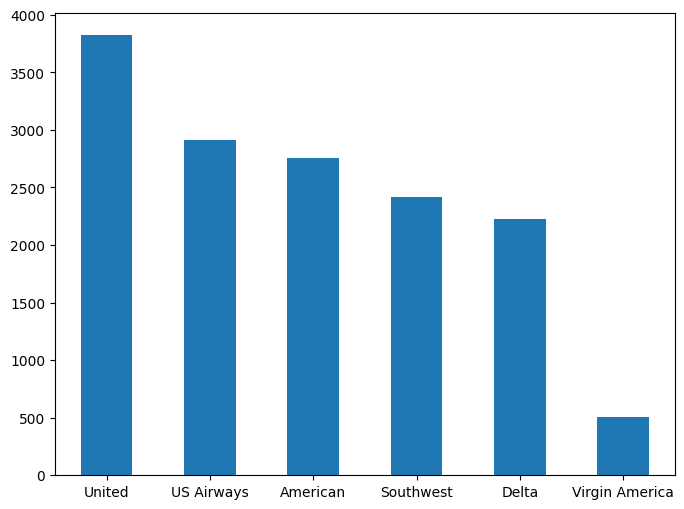

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

<Axes: title={'center': 'Sentiment by airline'}, xlabel='airline'>

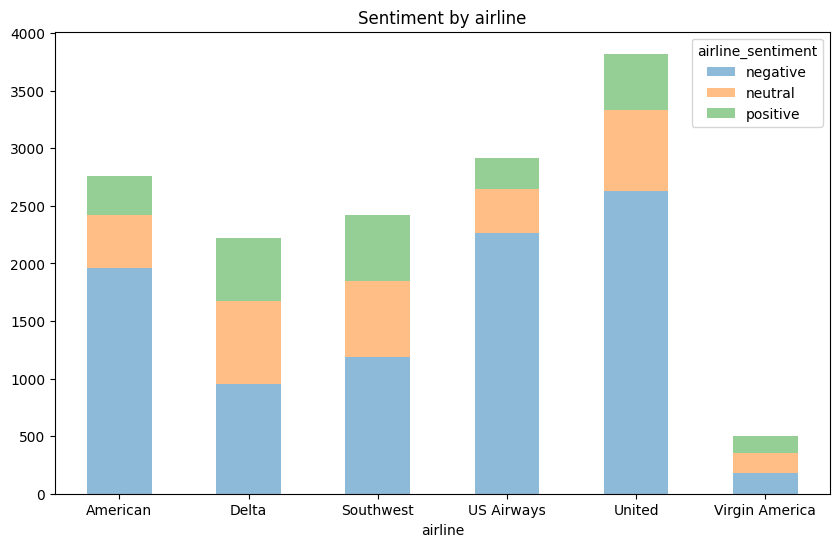

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 1.1

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
####
from scipy.sparse import hstack
from scipy.special import logit, expit

In [8]:
#Prepara los datos para el modelado
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [9]:
#look at the documents list
print("Our corpus: ", X)

Our corpus:  tweet_id
570306133677760513                  @VirginAmerica What @dhepburn said.
570301130888122368    @VirginAmerica plus you've added commercials t...
570301083672813571    @VirginAmerica I didn't today... Must mean I n...
570301031407624196    @VirginAmerica it's really aggressive to blast...
570300817074462722    @VirginAmerica and it's a really big bad thing...
                                            ...                        
569587686496825344    @AmericanAir thank you we got on a different f...
569587371693355008    @AmericanAir leaving over 20 minutes Late Flig...
569587242672398336    @AmericanAir Please bring American Airlines to...
569587188687634433    @AmericanAir you have my money, you change my ...
569587140490866689    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object


Count Vectorizer

In [10]:
#Crea un objeto CountVectorizer, que se utilizará para convertir el texto en una representación numérica (Bag of Words - BoW).
count_vect = CountVectorizer()
#Build a BOW representation for the corpus
bow_rep_X = count_vect.fit_transform(X)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect.vocabulary_)

Our vocabulary:  {'virginamerica': 14273, 'what': 14551, 'dhepburn': 4804, 'said': 11646, 'plus': 10438, 'you': 14944, 've': 14193, 'added': 1965, 'commercials': 4030, 'to': 13326, 'the': 13120, 'experience': 5665, 'tacky': 12925, 'didn': 4821, 'today': 13330, 'must': 9234, 'mean': 8837, 'need': 9375, 'take': 12941, 'another': 2331, 'trip': 13509, 'it': 7685, 'really': 11020, 'aggressive': 2054, 'blast': 3070, 'obnoxious': 9726, 'entertainment': 5455, 'in': 7381, 'your': 14953, 'guests': 6733, 'faces': 5740, 'amp': 2263, 'they': 13167, 'have': 6868, 'little': 8392, 'recourse': 11078, 'and': 2281, 'big': 3007, 'bad': 2746, 'thing': 13176, 'about': 1862, 'seriously': 11914, 'would': 14778, 'pay': 10175, '30': 761, 'flight': 6004, 'for': 6157, 'seats': 11832, 'that': 13115, 'this': 13188, 'playing': 10403, 'only': 9836, 'flying': 6101, 'va': 14145, 'yes': 14922, 'nearly': 9371, 'every': 5572, 'time': 13270, 'fly': 6086, 'vx': 14345, 'ear': 5238, 'worm': 14751, 'won': 14715, 'go': 6557, 'a

In [11]:
#see the BOW rep for first 2 documents
print("BoW representation for '@VirginAmerica What @dhepburn said.': ", bow_rep_X[0].toarray())
print("BoW representation for '@VirginAmerica plus you've added commercials': ",bow_rep_X[1].toarray())

BoW representation for '@VirginAmerica What @dhepburn said.':  [[0 0 0 ... 0 0 0]]
BoW representation for '@VirginAmerica plus you've added commercials':  [[0 0 0 ... 0 0 0]]


In [12]:
# Dividir los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(bow_rep_X, y, test_size=0.30, random_state=42)

In [13]:
# Create classifier, fit and predict
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score,ConfusionMatrixDisplay

In [16]:
### Evalúe el desempeño de su modelo en train
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.78      0.96      0.86      2814
           0       0.68      0.40      0.50       884
           1       0.84      0.47      0.60       694

    accuracy                           0.77      4392
   macro avg       0.77      0.61      0.66      4392
weighted avg       0.77      0.77      0.75      4392



# Exercise 1.2

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [ ]:
count_vect = CountVectorizer(stop_words='english')
#Build a BOW representation for the corpus
bow_rep_X = count_vect.fit_transform(X)

In [26]:
### Utilice train_test_split para dividir los datos en entrenamiento y test.
X_train, X_test, y_train, y_test = train_test_split(bow_rep_X, y, test_size=0.30, random_state=42)

In [ ]:
# Create classifier, fit and predict
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [ ]:
### Evalúe el desempeño de su modelo en train
print(classification_report(y_test, pred))

# Exercise 1.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

In [ ]:
#NGram y con StopWords
count_vect = CountVectorizer(stop_words='english', ngram_range=(1, 3))
#Build a BOW representation for the corpus
bow_rep_X = count_vect.fit_transform(X)

In [ ]:
### Utilice train_test_split para dividir los datos en entrenamiento y test.
X_train, X_test, y_train, y_test = train_test_split(bow_rep_X, y, test_size=0.30, random_state=42)

In [ ]:
# Create classifier, fit and predict
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [ ]:
### Evalúe el desempeño de su modelo en test
print(classification_report(y_test, pred))

In [ ]:
#NGram y Sin StopWords
count_vect = CountVectorizer(ngram_range=(1, 3))
#Build a BOW representation for the corpus
bow_rep_X = count_vect.fit_transform(X)

In [ ]:
### Utilice train_test_split para dividir los datos en entrenamiento y test.
X_train, X_test, y_train, y_test = train_test_split(bow_rep_X, y, test_size=0.30, random_state=42)

In [ ]:
# Create classifier, fit and predict
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [ ]:
### Evalúe el desempeño de su modelo en test
print(classification_report(y_test, pred))

# Exercise 1.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
bow_rep_tfidf = tfidf.fit_transform(X)

In [ ]:
#IDF for all words in the vocabulary
print("IDF for all words in the vocabulary",tfidf.idf_)
print("-"*10)

In [ ]:
#All words in the vocabulary.
print("All words in the vocabulary",tfidf.vocabulary_)
print("-"*10)

In [ ]:
#TFIDF representation for all documents in our corpus
print("TFIDF representation for all documents in our corpus\n",bow_rep_tfidf.toarray())
print("-"*10)

In [ ]:
temp = tfidf.transform(["dog and man are friends"])
print("Tfidf representation for 'dog and man are friends':\n", temp.toarray())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bow_rep_tfidf, y, test_size=0.30, random_state=42)

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(pd.Series(cross_val_score(clf, X_dtm, y, cv=10)).describe())

In [ ]:
### Evalúe el desempeño de su modelo en test
print(classification_report(y_test, pred))